# Finding peak cross correlation to determine optimal lag.
A small demonstration of why finding optimal lag might be helpful.

In [ ]:
from scipy import signal
from numpy.random import default_rng
rng = default_rng()
x = np.arange(0, 4 * np.pi, 0.01 * np.pi)
y = np.cos(x)
z = np.sin(x)

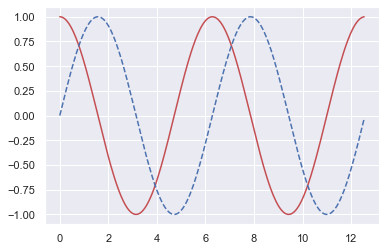

In [ ]:
%matplotlib inline
plt.plot(x, y, 'r')
plt.plot(x, z, '--')
plt.show()

Visually we can see that the cosine curve leads the sin curve in time. Therefore, given the appropriate lag time, we could say that $y(t) = cos(t)$ is a predictor of $z(t) = sin(t)$. Using time lagged cross correlation, we can find that optimal lag $\Delta t$. Then we can estimate the value of z by:

$$
\hat{z} = y(t + \Delta t)
$$

In [32]:
correlation = signal.correlate(x, y, mode="same")
lags = signal.correlation_lags(x.size, y.size, mode="same")
lag = lags[np.argmax(correlation)]
lag

152

If we push the cosine signal forward by 152 time steps, we see that it estimates sine. 

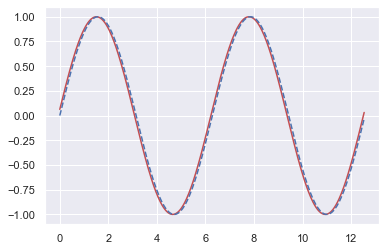

In [33]:
lag_y = np.roll(y, -lag)
plt.plot(x, lag_y, 'r')
plt.plot(x, z, '--')